In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (convert 28x28 images to 784-dimensional vectors)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 5s 16ms/step - loss: 0.2400 - val_loss: 0.1746
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 0.1628 - val_loss: 0.1514
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1472 - val_loss: 0.1414
Epoch 4/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1393 - val_loss: 0.1350
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1339 - val_loss: 0.1315
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1301 - val_loss: 0.1274
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1270 - val_loss: 0.1251
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1246 - val_loss: 0.1229
Epoch 9/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1228 - val_loss: 0.1211
Epoch 10/10
235/235 [==============================] - 3s 15ms/step - loss: 0.1212 - val_lo

In [ ]:
# Evaluate the autoencoder model
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio

mse = mean_squared_error(x_test, decoded_imgs)
psnr = peak_signal_noise_ratio(x_test, decoded_imgs)

print(f"Mean Squared Error: {mse}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr}")

# print(f"Mean Squared Error: {round(mse*100,2)}%")
# print(f"Peak Signal-to-Noise Ratio (PSNR): {round(psnr*100,2)}%")

Mean Squared Error: 0.018790461122989655
Peak Signal-to-Noise Ratio (PSNR): 17.260601985507364
Mean Squared Error: 1.88%
Peak Signal-to-Noise Ratio (PSNR): 1726.06%


313/313 [==============================] - 1s 2ms/step


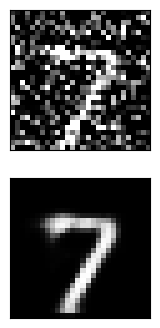

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 1  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
autoencoder.save("trained_denoising_autoencoder_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('trained_denoising_autoencoder_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Note : Convert .h5 to .json for tensorflowjs by Command prompt

\> tensorflowjs_converter --input_format=keras _path_/autoencoder_model.h5 _path_